# Virtual Intership KPMG

KPMG’s Analytics, Information & Modelling group helps organisations take the mystery out of big data and show them how to leverage their data resources to produce better business outcomes.

## Task 1 
**Data Quality Assessment**<br>
Data is from Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation.<br>

**The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues**

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd 
pd.set_option('max.columns',50)
pd.set_option('max.rows',70)
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

# Loading the Data

In [2]:
transaction = pd.read_excel('kpmg_data.xlsx', sheet_name='Transactions')
cus_list = pd.read_excel('kpmg_data.xlsx', sheet_name='NewCustomerList')
cus_add = pd.read_excel('kpmg_data.xlsx', sheet_name='CustomerAddress')
cus_dem = pd.read_excel('kpmg_data.xlsx', sheet_name='CustomerDemographic')

## Uderstanding The Data

In [3]:
print("Transaction data set dtypes: \n")
print(f"Shape : {transaction.shape}")
print(f"{transaction.dtypes.value_counts()}")

print('~'*30)

print("NewCustomerList data set dtypes: \n")
print(f"Shape : {cus_list.shape}")
print(f"{cus_list.dtypes.value_counts()}")

print('~'*30)

print("CustomerAddress data set dtypes: \n")
print(f"Shape : {cus_add.shape}")
print(f"{cus_add.dtypes.value_counts()}")

print('~'*30)

print("CustomerDemographic data set dtypes: \n")
print(f"Shape : {cus_dem.shape}")
print(f"{cus_dem.dtypes.value_counts()}")

Transaction data set dtypes: 

Shape : (20000, 13)
object            5
float64           4
int64             3
datetime64[ns]    1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NewCustomerList data set dtypes: 

Shape : (1000, 23)
object            11
int64              6
float64            5
datetime64[ns]     1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CustomerAddress data set dtypes: 

Shape : (3999, 6)
int64     3
object    3
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CustomerDemographic data set dtypes: 

Shape : (4000, 13)
object            9
int64             2
datetime64[ns]    1
float64           1
dtype: int64


In [4]:
transaction.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [5]:
cus_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.69,0.8625,1.078125,0.916406,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1.02,1.0200,1.275000,1.083750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.41,0.4100,0.410000,0.410000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.41,0.5125,0.512500,0.512500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.76,0.7600,0.950000,0.950000,4,4,1.703125


In [6]:
cus_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
cus_dem.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1159,1160,Trisha,Nisuis,Female,98,1965-04-08,Speech Pathologist,IT,Affluent Customer,N,<script>alert('hi')</script>,No,10.0
2044,2045,Hermina,Franzel,Female,15,1984-07-03,VP Sales,Financial Services,High Net Worth,N,-100,No,15.0
1591,1592,Thorin,Klagges,Male,21,1986-08-04,Software Test Engineer III,NaN,Mass Customer,N,0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â...,Yes,14.0
2094,2095,Anette,Guerreiro,Female,69,1989-11-13,Account Executive,Manufacturing,Affluent Customer,N,1000000000000000049861653971908893017010268485...,No,8.0
954,955,Teresina,Gibbie,Female,78,1989-10-01,Research Nurse,Health,Mass Customer,N,â,Yes,9.0
2523,2524,Rustie,Kingsland,Male,84,1969-05-29,Help Desk Technician,Retail,Mass Customer,N,nil,Yes,8.0
356,357,Betta,Shrimpton,Female,21,1969-01-25,Director of Sales,NaN,Affluent Customer,N,NaN,No,18.0
3943,3944,Urbain,Sinnock,Male,28,1973-05-04,Engineer III,IT,Affluent Customer,N,âð¿ ðªð¿ ðð¿ ðð¿ ðð¿ ðð¿,No,3.0
3599,3600,Godart,Gooderick,Male,88,1962-05-17,Staff Accountant II,NaN,Mass Customer,N,() { 0; }; touch /tmp/blns.shellshock1.fail;,No,16.0
1541,1542,Sanders,Fernyhough,Male,56,1978-07-27,Food Chemist,Health,Mass Customer,N,Ù¡Ù¢Ù£,Yes,12.0


## Missing Values

In [8]:
cus_dem.rename(columns = {'past_3_years_bike_related_purchases':'bike_purchase'}, inplace = True) 
cus_list.rename(columns = {'past_3_years_bike_related_purchases':'bike_purchase'}, inplace = True)
cus_dem.rename(columns = {'job_industry_category':'job_industry'}, inplace = True) 
cus_list.rename(columns = {'job_industry_category':'job_industry'}, inplace = True) 

Missing_Values in Transaction


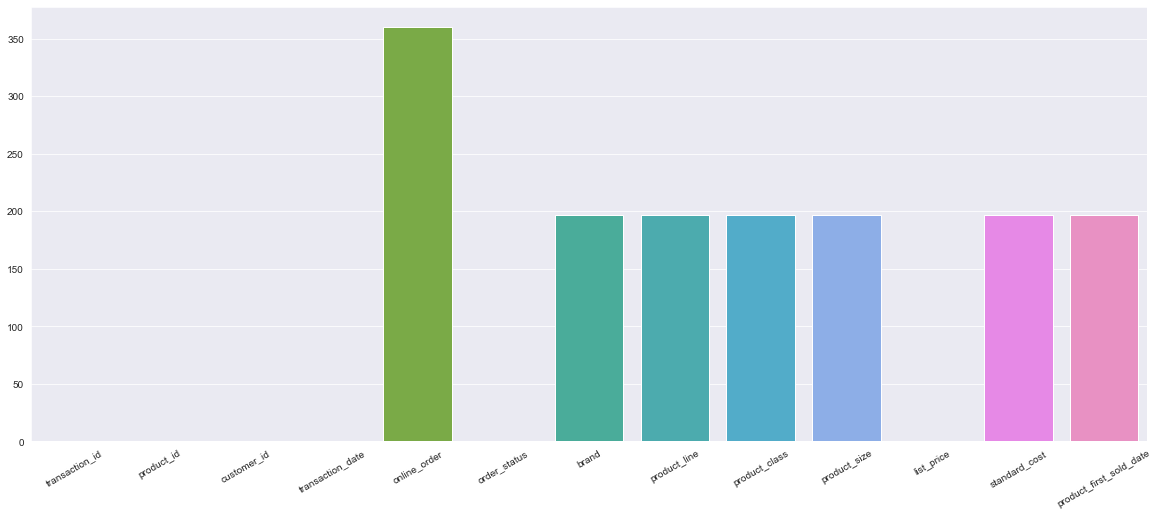

Missing_Values in CustomerAddress


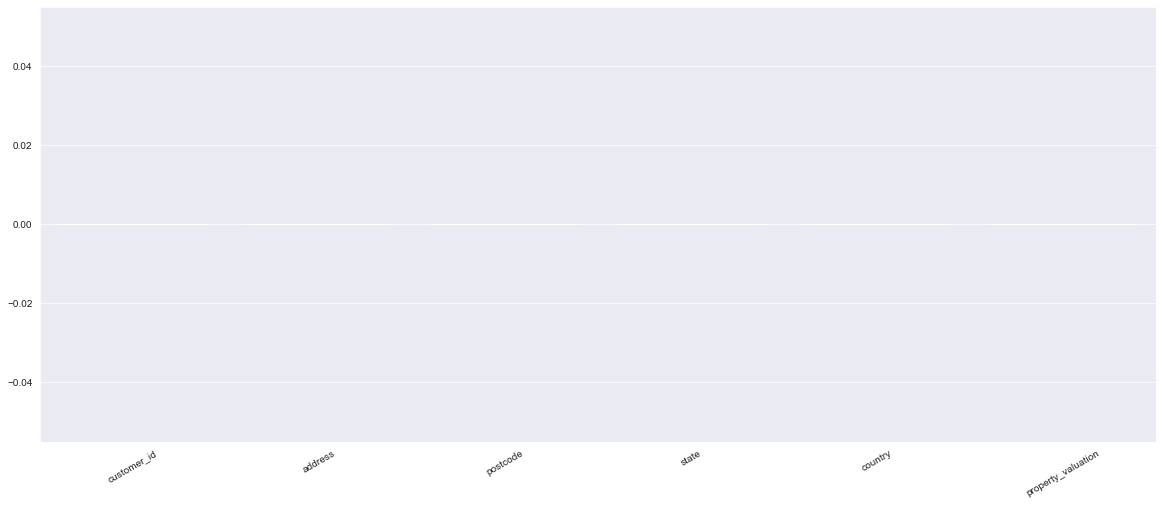

Missing_Values in CustomerDemographic


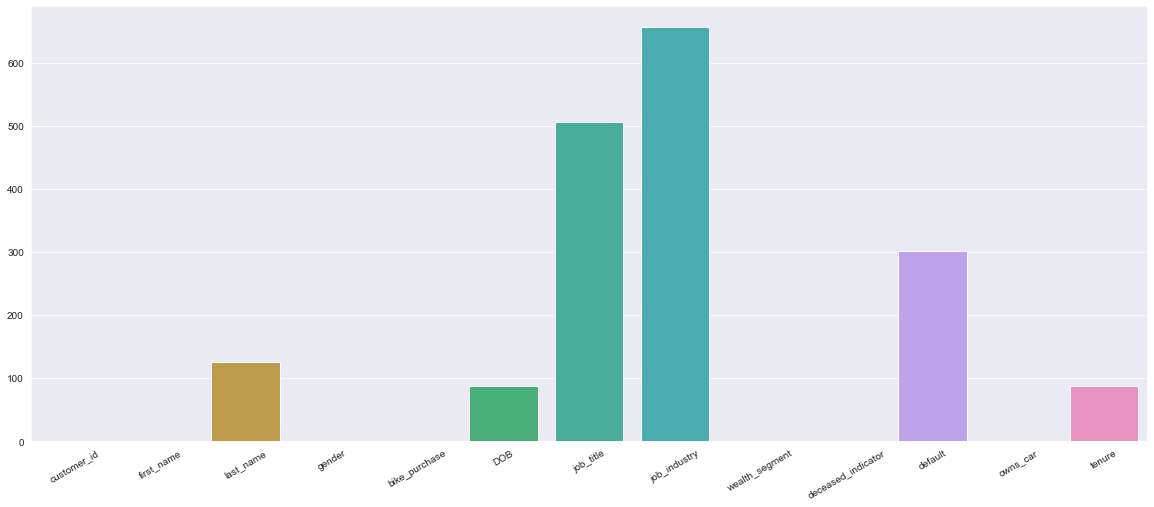

Missing_Values in NewCustomerList


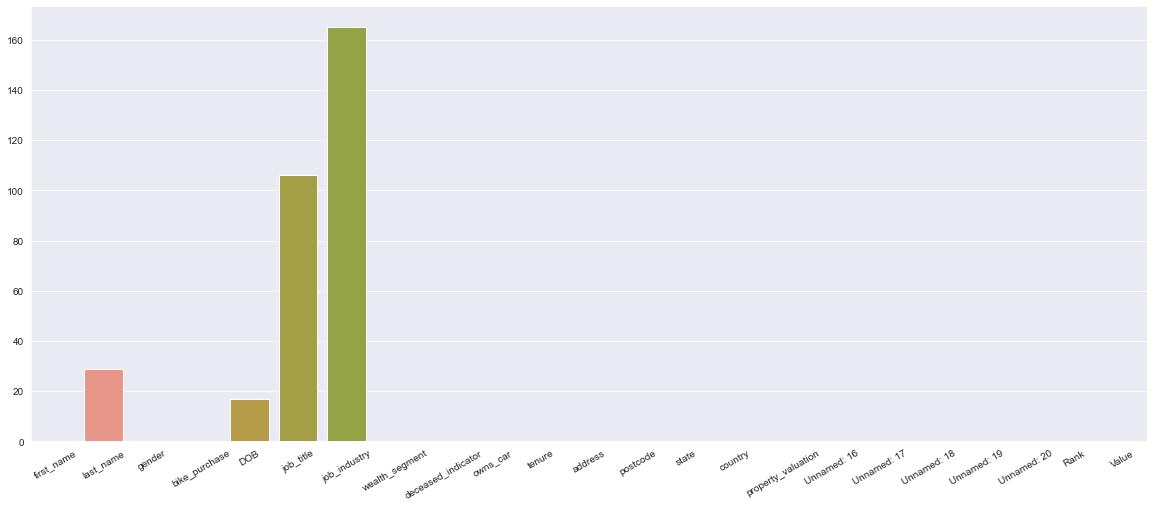

In [9]:
datasheets = [transaction,cus_add,cus_dem,cus_list]
names = ['Transaction','CustomerAddress','CustomerDemographic','NewCustomerList']
for data,name in zip(datasheets,names):
    print('Missing_Values in {}'.format(name))
    plt.figure(figsize=(20,8))
    sns.barplot(x=data.columns,y=data.isnull().sum())
    plt.xticks(rotation=30)
    plt.show()

### Transaction<br>
1. Online Order has 360 missing values which is roughly 1.8 percent of the data
2. Brand, Product_Line, Product_Class, Product_Size, Standard_Cost and product_first_sold_date has 1 percent missing data

### Customer Address <br>
1. No missing values

### CustomerDemograhic and CustomerList<br>
1. They have almost the same missing values [ last_name, DOB, job_title, job_industry ]
2. CustomerDemograhic has 1.51percent missing values in default and 0.5 percent missing values in tenure

# Dealing With DataSheet

**Transaction**
1. The data is not sorted according to Transaction_date 
2. Got a quite a few same number of missing values in Brand, Product_Line, Product_Class, Product_Size, Standard_Cost and product_first_sold_date 

In [10]:
# Sorting by transaction date 
transaction = transaction.sort_values(by='transaction_date')

In [11]:
# Filling missing values with highest occurance of value
transaction['online_order'].fillna(transaction.online_order.mode()[0],inplace=True)

In [12]:
# Dropping the other values which has no standard_cost, product_first_sold_date, and other 3. 
transaction.dropna(inplace=True)

**CustomerDemographic**
1. We can combine Customer address and Customer Demographic untill id 4000
2. Customer Address has got some diff values for same category
2. Gender column has got some irregular values
3. Default column is unclear, we can remove it.
4. We can covert the DOB into a new column as Age

In [13]:
cus_add = cus_add[cus_add['customer_id'] <= 4000 ]
cus_add.loc[cus_add['state']=='New South Wales','state'] = 'NSW'
cus_add.loc[cus_add['state']=='Victoria','state'] = 'VIC'

In [14]:
new_cus_dem = cus_dem.merge(cus_add,how='right',on='customer_id')

In [15]:
# Correcting irregualr values
new_cus_dem.loc[new_cus_dem['gender']=='M','gender'] = 'Male'
new_cus_dem.loc[new_cus_dem['gender']=='Femal','gender'] = 'Female'
new_cus_dem.loc[new_cus_dem['gender']=='F','gender'] = 'Female'
# Lets classify U as unknown
new_cus_dem.loc[new_cus_dem['gender']=='U','gender'] = 'Unknown'

In [16]:
# Dropping of the default column because of it unclear values
new_cus_dem = new_cus_dem.drop('default',axis=1)

Incase if client says that don't have the values needed for job_title and job_industry

In [17]:
# Lets drop off rows which has both job_title and job_industry missing 
new_cus_dem = new_cus_dem[(new_cus_dem['job_title'].notna()) | (new_cus_dem['job_industry'].notna())]
# Lets fill job_title with member as of now 
new_cus_dem['job_title'] = new_cus_dem['job_title'].fillna('Member')
# Lets fill job_industry as others as of now 
new_cus_dem['job_industry'] = new_cus_dem['job_industry'].fillna('Others')
# Lets fill the missing values in last name with a '.'
new_cus_dem['last_name'] = new_cus_dem['last_name'].fillna('.')

In [18]:
new_cus_dem.groupby('wealth_segment').mean()

,customer_id,bike_purchase,tenure,postcode,property_valuation
wealth_segment,,,,,
Affluent Customer,1998.929990,48.789969,10.516472,2982.658307,7.630094
High Net Worth,1975.764170,47.456478,10.812046,2982.704453,7.401822
Mass Customer,2010.250642,49.784284,10.689111,2982.023112,7.516692


In [19]:
# As you can see above tenure as a mean value of ~10.5
new_cus_dem['tenure'] = new_cus_dem['tenure'].fillna(10.5)

In [20]:
# Creating a new column age
new_cus_dem['age'] = new_cus_dem['DOB'].apply(lambda x: 2021 - x.year)

**This column DOB must be wrong**

In [21]:
new_cus_dem[new_cus_dem['age'] > 100]

,customer_id,first_name,last_name,gender,bike_purchase,DOB,job_title,job_industry,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
29,34,Jephthah,Bachmann,Unknown,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,178.0


In [22]:
new_cus_dem.dropna(inplace=True)

**NewCustomerList**
1. We got 5 unknown columns ,we have to ask whether the represent something, if not we can drop them!
2. We do changes something similar to CustomerDemographic 

In [23]:
cus_list.loc[cus_list['gender']=='U','gender'] = 'Unknown'

Incase if client says that don't have the values needed for job_title and job_industry

In [24]:
# Lets drop off rows which has both job_title and job_industry missing 
cus_list = cus_list[(cus_list['job_title'].notna()) | (cus_list['job_industry'].notna())]
# Lets fill job_title with member as of now 
cus_list['job_title'] = cus_list['job_title'].fillna('Member')
# Lets fill job_industry as others as of now 
cus_list['job_industry'] = cus_list['job_industry'].fillna('Others')

In [25]:
# Lets fill the missing values in last name with a '.'
cus_list['last_name'] = cus_list['last_name'].fillna('.')

In [26]:
cus_list['age'] = cus_list['DOB'].apply(lambda x: 2021 - x.year)

In [27]:
cus_list = cus_list.dropna()

**Cleaned Data**

In [28]:
with pd.ExcelWriter('clean_kpmg_data.xlsx') as writer:  
    new_cus_dem.to_excel(writer, sheet_name='CustomerDeomgraphic')
    transaction.to_excel(writer, sheet_name='Transactions')
    cus_list.to_excel(writer, sheet_name='NewCustomerList')

# Conclusion

1. Missing Values roughly about ~2 or lesser percent seen in job_title, job_industry, Brand, Product_Line, Product_Class, Product_Size, Standard_Cost , product_first_sold_date and Online Order.   
2. Some Outliers detected in DOB and CustomerID's(extra id's noticed)
3. Some columns with Inconsistent name's (in NewCustomerList)
4. Gender column has got some inconsistent values (minute)
5. Dataset is not sorted according to the transaction_date
6. Inconsistent values in the Default columns
7. Inaccurate different values for States (NSW/New South Whales , VIC/Victoria)